In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


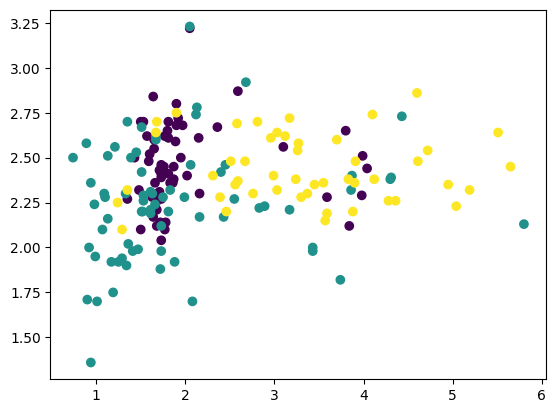

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

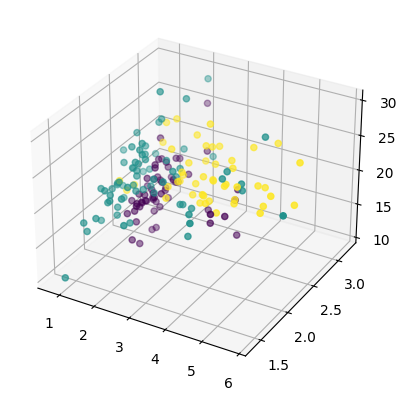

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing  the 3D plotting toolkit

# Creating  a new figure
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Now, we proceed with our scatter plot code
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y)

# Showing the plot
plt.show()


In [ ]:
#But this doesn’t reveal much of how the data looks like, because majority of the features are not shown.
# We now resort to principal component analysis:

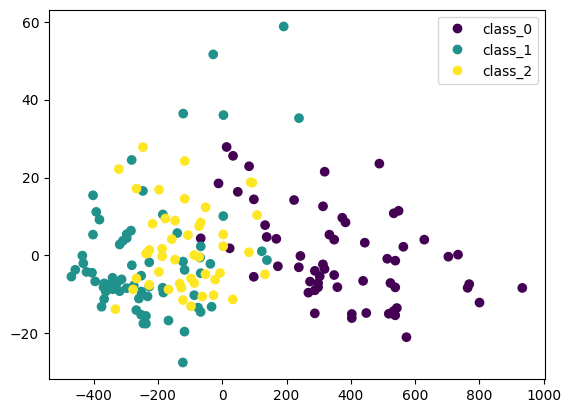

In [ ]:

from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

In [ ]:
#Here we transform the input data X by PCA into Xt. We consider only the first two columns, which contain the most information,
#and plot it in two dimensional. We can see that the purple class is quite distinctive, but there is still some overlap.
#If we scale the data before PCA, the result would be different

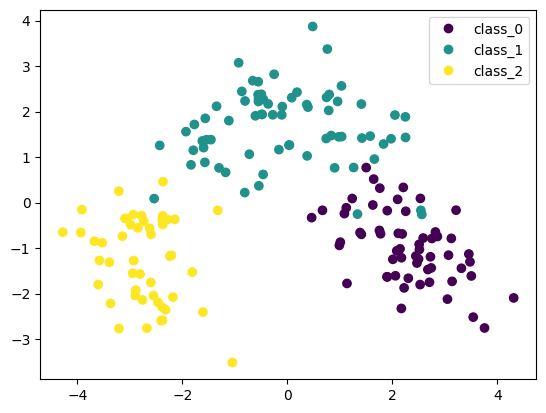

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

In [ ]:
#PCA is sensitive to the scale, if we normalized each feature by StandardScaler we can see a better result.
#Here the different classes are more distinctive. By looking at this plot,
#we are confident that a simple model such as SVM can classify this dataset in high accuracy.

X shape: (178, 13)
y shape: (178,)


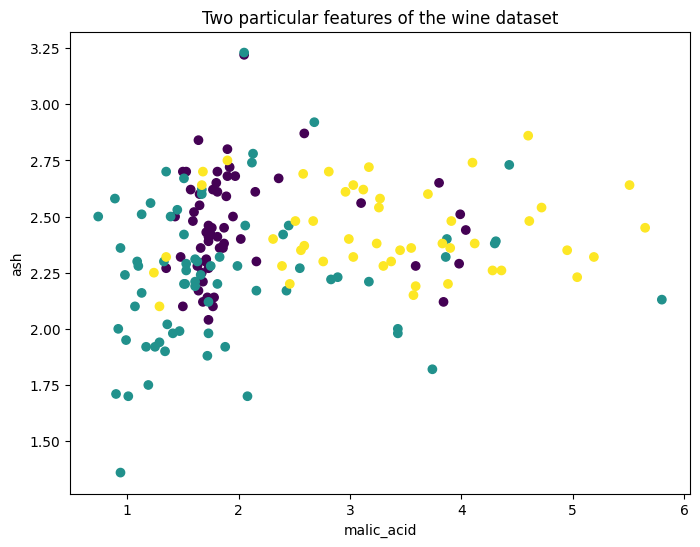

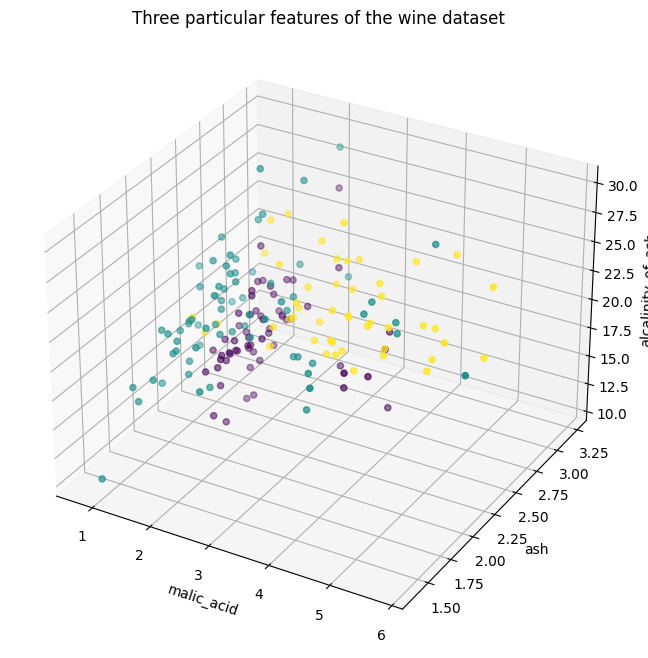

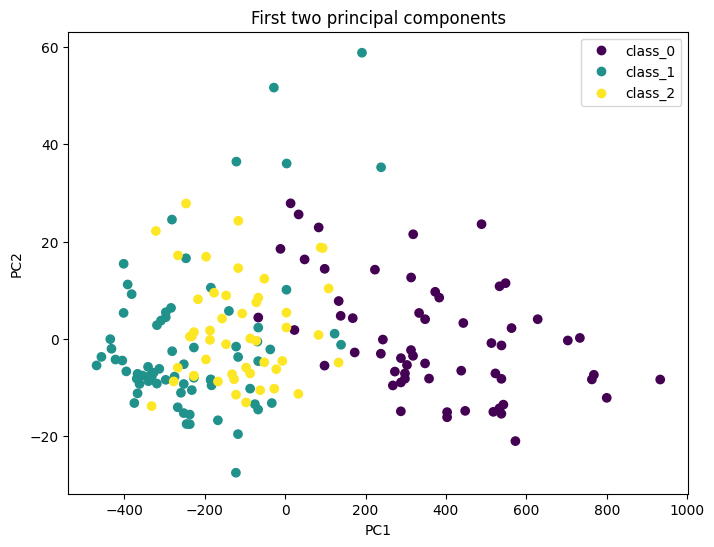

(178, 13)


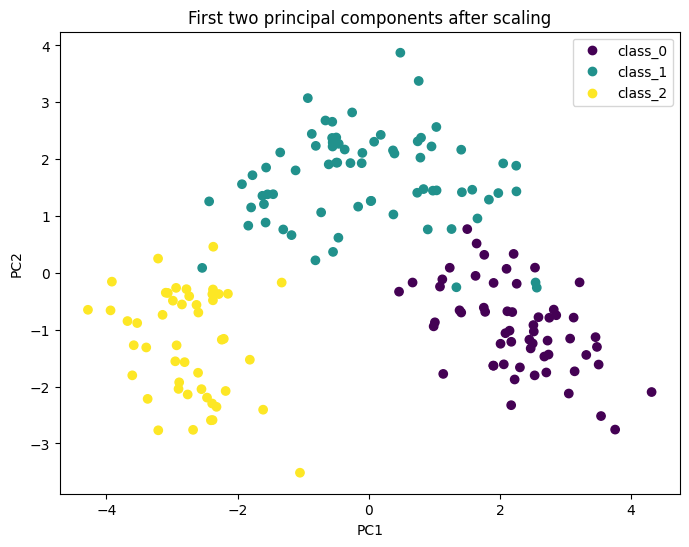

In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()


# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()


# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()
)

# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [ ]:
#apply the same method on a different dataset, such as MINST handwritten digits,
#the scatterplot is not showing distinctive boundary and therefore it needs a more complicated model such as neural network to classify:

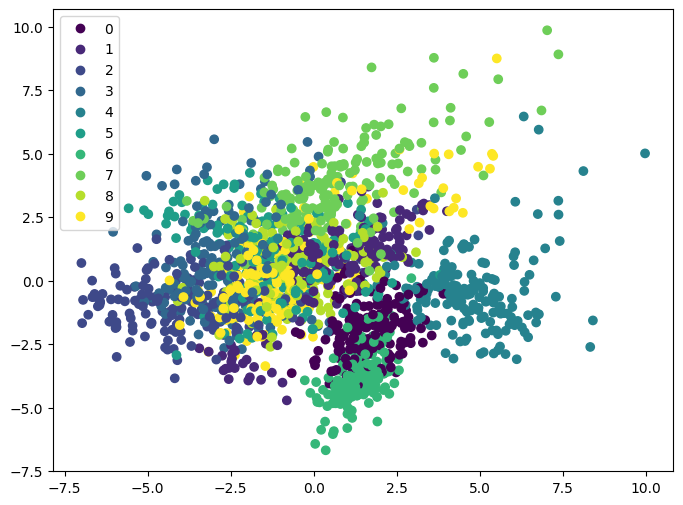

(1797, 64)
(1797,)
(1797, 64)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.show()
print(X.shape)
print(y.shape)
print(Xt.shape)

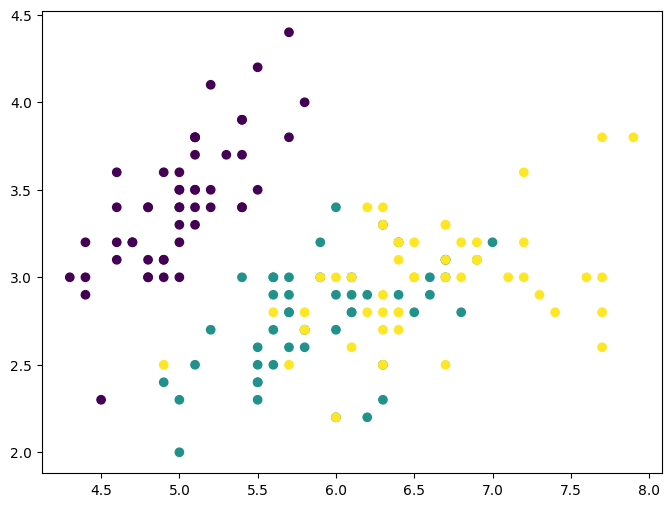

In [ ]:

#Visualizing the explained variance
from sklearn.datasets import load_iris
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
pca = PCA().fit(X)
print(pca.components_)


[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


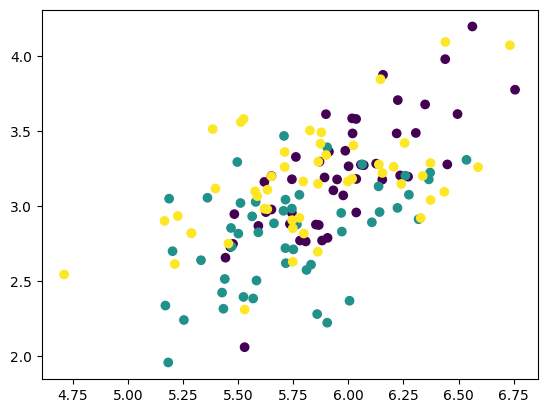

In [ ]:
# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

Shape after transformation: (150, 4)


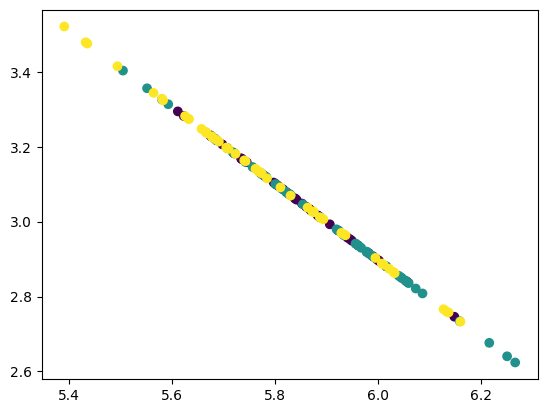

In [ ]:
# Remove PC2
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
print(Xremove.shape)
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

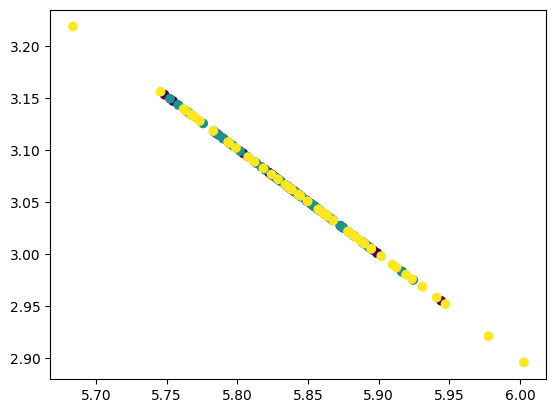

In [ ]:
# Remove PC3
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

Using all features, accuracy:  1.0
Using all features, F1:  1.0
Using PC1, accuracy:  0.94
Using PC1, F1:  0.9332591768631814


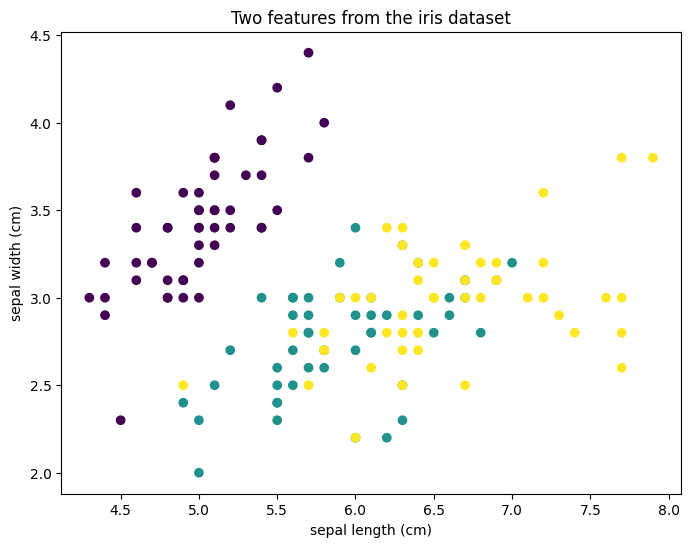

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


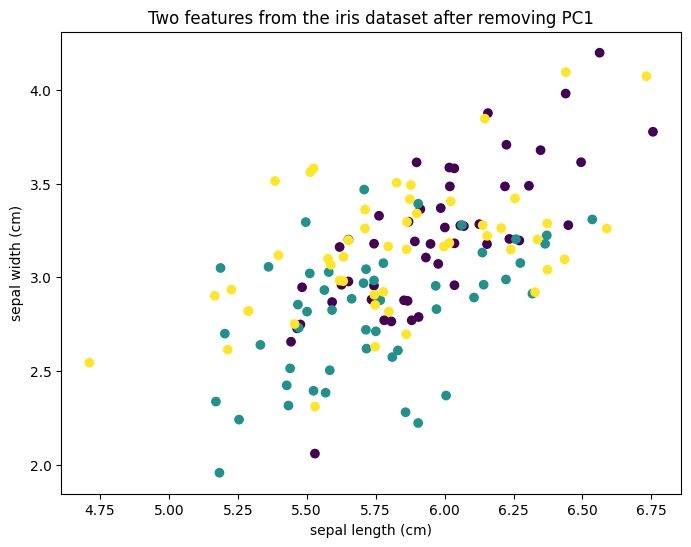

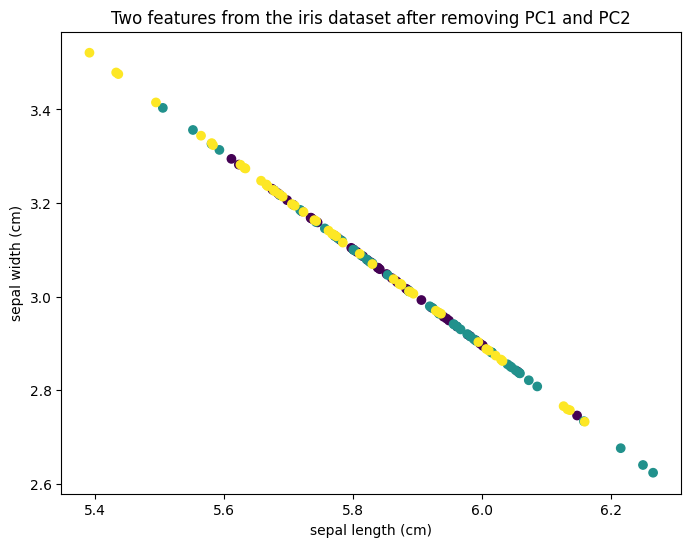

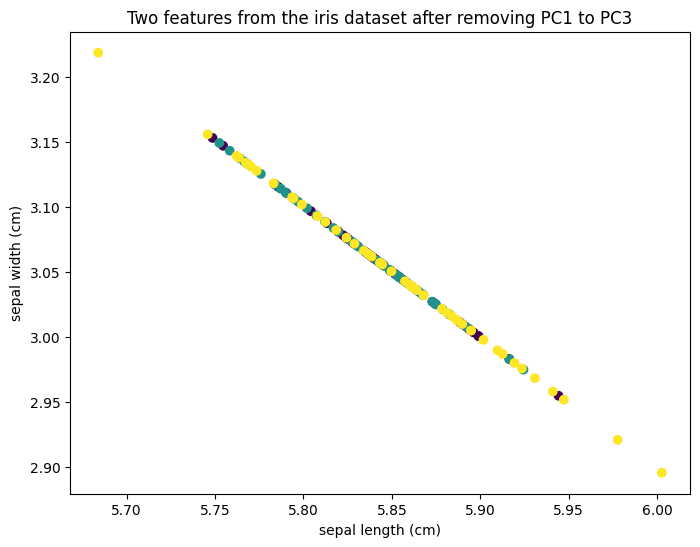

Explainedd variance ratios:
[0.92461872 0.05306648 0.01710261 0.00521218]
Using all features, accuracy:  0.98
Using all features, F1:  0.980238302818948
Using PC1, accuracy:  0.94
Using PC1, F1:  0.9411255411255411


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_)

# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1")
plt.show()

# Remove PC2
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 and PC2")
plt.show()

# Remove PC3
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 to PC3")
plt.show()

# Print the explained variance ratio
print("Explainedd variance ratios:")
print(pca.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifer on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

# Run classifier on PC1
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

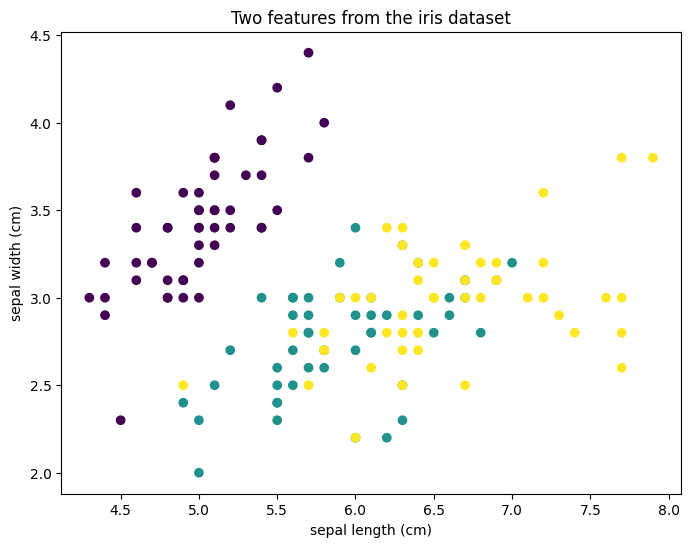

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


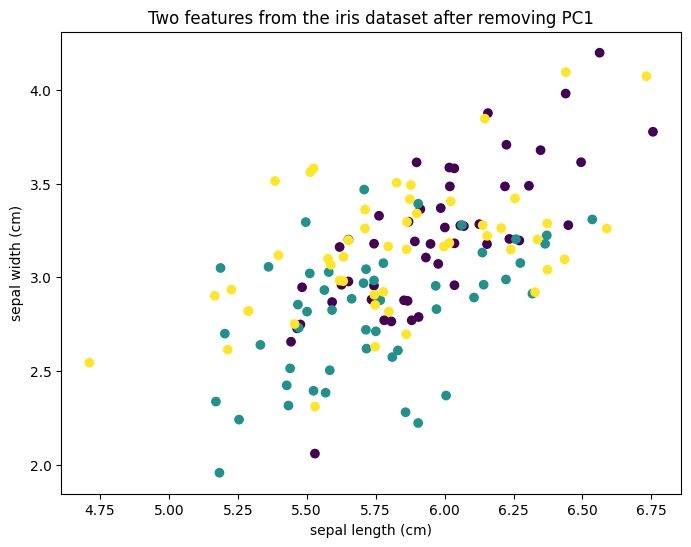

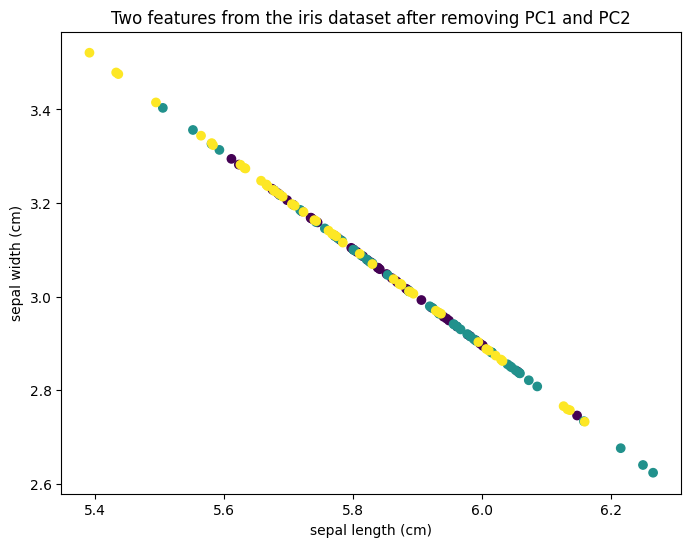

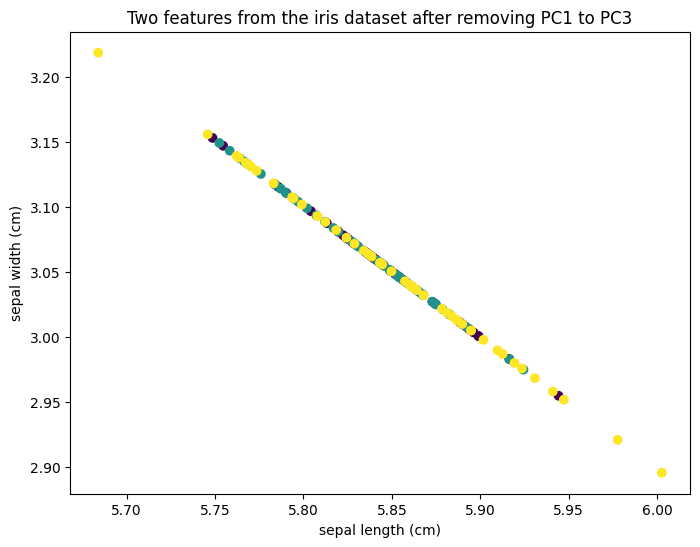

Explained variance ratios:
[0.92461872 0.05306648 0.01710261 0.00521218]
Using all features, accuracy:  0.98
Using all features, F1:  0.9794967381174278
Using PC1, accuracy:  0.48
Using PC1, F1:  0.44664902998236333


AttributeError: ignored

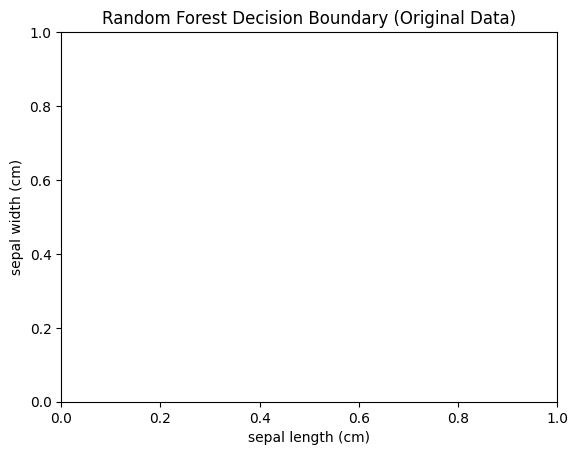

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

# Perform PCA
pca = PCA().fit(X)

# Show the principal components
print("Principal components:")
print(pca.components_)

# Define a function to remove principal components
def remove_pcs(data, components):
    X_mean = data - data.mean(axis=0)
    removed_pcs = np.zeros_like(X_mean)
    for component in components:
        value = X_mean @ component
        removed = value.reshape(-1, 1) @ component.reshape(1, -1)
        removed_pcs += removed
    return data - removed_pcs

# Remove PC1
X_remove_pc1 = remove_pcs(X, [pca.components_[0]])
plt.figure(figsize=(8, 6))
plt.scatter(X_remove_pc1[:, 0], X_remove_pc1[:, 1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1")
plt.show()

# Remove PC1 and PC2
X_remove_pc1_pc2 = remove_pcs(X_remove_pc1, [pca.components_[1]])
plt.figure(figsize=(8, 6))
plt.scatter(X_remove_pc1_pc2[:, 0], X_remove_pc1_pc2[:, 1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 and PC2")
plt.show()

# Remove PC1 to PC3
X_remove_pc1_pc2_pc3 = remove_pcs(X_remove_pc1_pc2, [pca.components_[2]])
plt.figure(figsize=(8, 6))
plt.scatter(X_remove_pc1_pc2_pc3[:, 0], X_remove_pc1_pc2_pc3[:, 1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 to PC3")
plt.show()

# Print the explained variance ratio
print("Explained variance ratios:")
print(pca.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifier on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
accuracy_all_features = clf.score(X_test, y_test)
f1_all_features = f1_score(y_test, clf.predict(X_test), average="macro")
print("Using all features, accuracy: ", accuracy_all_features)
print("Using all features, F1: ", f1_all_features)

# Run classifier on PC1
X_train_pc1 = remove_pcs(X_train, [pca.components_[0]])
X_test_pc1 = remove_pcs(X_test, [pca.components_[0]])
clf = SVC(kernel="linear", gamma='auto').fit(X_train_pc1, y_train)
accuracy_pc1 = clf.score(X_test_pc1, y_test)
f1_pc1 = f1_score(y_test, clf.predict(X_test_pc1), average="macro")
print("Using PC1, accuracy: ", accuracy_pc1)
print("Using PC1, F1: ", f1_pc1)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title('Random Forest Decision Boundary (Original Data)')
print(pca.shape)
